<a href="https://colab.research.google.com/github/yugant10-commits/Movie-Review/blob/main/IMDB_Movie_Review_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
from keras.datasets import imdb
from keras import models, layers, optimizers, losses, metrics
import numpy as np



In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
max([max(word) for word in train_data])
word_index = imdb.get_word_index()

reverse_word_index= dict(
    [(value,key) for (key, value) in word_index.items()]
) 
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '...') for i in train_data[100]]
)
print(decoded_review)

... i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of crudely drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was foisted on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep adjusting the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the deluxe box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10


In [ ]:
def vectorize_sequences(sequences, dimension= 10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model= models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


**Compiling the model**

In [ ]:
x_val = x_train[:10000]
partial_x_train=x_train[10000:]

y_val = y_train[:10000]
partial_y_train=y_train[10000:]

In [ ]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 42ms/step - loss: 0.0594 - acc: 0.9834 - val_loss: 1.0017 - val_acc: 0.8299
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0166 - acc: 0.9964 - val_loss: 1.0096 - val_acc: 0.8271
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0088 - acc: 0.9989 - val_loss: 1.0286 - val_acc: 0.8286
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0216 - acc: 0.9940 - val_loss: 1.0322 - val_acc: 0.8275
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0102 - acc: 0.9979 - val_loss: 1.1184 - val_acc: 0.8214
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0116 - acc: 0.9984 - val_loss: 1.0509 - val_acc: 0.8283
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0096 - acc: 0.9985 - val_loss: 1.0693 - val_acc: 0.8252
Epoch 8/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0077 - a

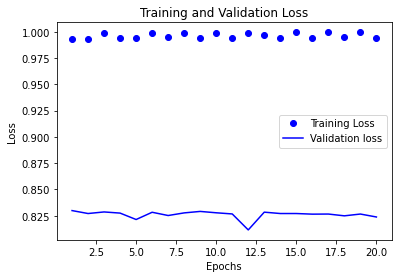

In [ ]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
acc_values= history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values,'bo', label = 'Training Loss')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs= 4, batch_size=512)
results = model.evaluate(x_test, y_test)

NameError: ignored

In [ ]:
import tensorflow as tf

sequences = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]])
dimension= 10
results = np.zeros((len(sequences), dimension))
for i,sequence in enumerate(sequences):
  results[i,sequence] = 1
print(results)

[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]]
